# Práctica 4 de IA

# 2. Construcción de un clasificador en una base de datos real (1.5 puntos)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [31]:
df = pd.read_csv("pima.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(768, 9)


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


**El objetivo es predecir si una paciente tiene o no diabetes a partir de los valores de otras variables. La variable target es "class".**

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Class:** Class variable ("yes" / "no")

In [32]:
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
print(nombres_atrs)
X = df[nombres_atrs].values
y = df['class'].values

['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


**Estadísticos básicos de cada atributo:**

In [33]:
df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("yes"/"no"):**

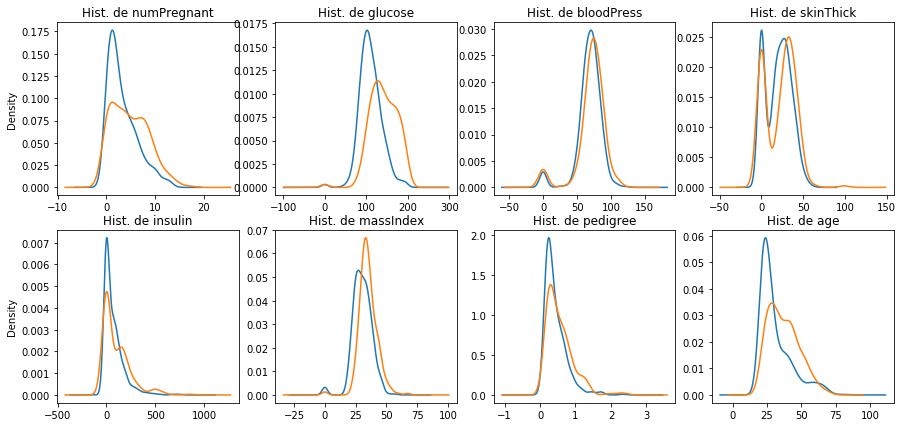

In [34]:
plt.figure(figsize=(15,7))
for i,n in enumerate(nombres_atrs):
    plt.subplot(2,4,i+1)
    aux = 'Density' if i%4==0 else ''
    df.groupby("class")[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux);

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [35]:
# k-nn
for i in range(1,11):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf, X, y, cv=5)
    print("k=" + str(i) + " Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

k=1 Score global del modelo: 0.66 +/- 0.05
k=2 Score global del modelo: 0.69 +/- 0.02
k=3 Score global del modelo: 0.71 +/- 0.03
k=4 Score global del modelo: 0.72 +/- 0.01
k=5 Score global del modelo: 0.72 +/- 0.02
k=6 Score global del modelo: 0.73 +/- 0.02
k=7 Score global del modelo: 0.74 +/- 0.02
k=8 Score global del modelo: 0.75 +/- 0.02
k=9 Score global del modelo: 0.74 +/- 0.03
k=10 Score global del modelo: 0.74 +/- 0.03


In [36]:
# Decision tree
for i in range(1,11):
    clf = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, X, y, cv=5)
    print("d=" + str(i) + " Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

d=1 Score global del modelo: 0.72 +/- 0.03
d=2 Score global del modelo: 0.74 +/- 0.01
d=3 Score global del modelo: 0.73 +/- 0.01
d=4 Score global del modelo: 0.73 +/- 0.03
d=5 Score global del modelo: 0.75 +/- 0.04
d=6 Score global del modelo: 0.72 +/- 0.03
d=7 Score global del modelo: 0.73 +/- 0.04
d=8 Score global del modelo: 0.72 +/- 0.03
d=9 Score global del modelo: 0.71 +/- 0.03
d=10 Score global del modelo: 0.70 +/- 0.05


## Responde aquí a las siguientes preguntas:

* ¿Cuál es el mejor score que consigues con un k-nn y con qué k (valor de n_neighbours)?
* ¿Cuál es el mejor score que consigues con un árbol de decisión y con qué profundidad máxima (valor de max_depth)?
* ¿Cuál es el mejor score que consigues con una red neuronal y con qué configuración (valor de hidden_layer_sizes)?

Nota: para responder a estas preguntas sólo hay que cambiar el tipo de modelo y sus parámetros en la celda anterior.

All the results to these questions have been deduced with the code provided above for each model type.

* The best k for the k-nn algorithm is **k=8** with a global score of the model: 0.75 +/- 0.02

* The best maximum depth for the decision tree is **d=5** with a global score of the model: 0.75 +/- 0.04